# Análise exploratória Tycho Brahe

In [104]:
import re,os,csv
import spacy
import numpy as np

nlp = spacy.load('pt_core_news_sm')

## Para rodar os resultados importar somente essas bibliotecas

In [33]:
import nltk, csv
import matplotlib.pyplot as plt
from unicodedata import normalize
from nltk.corpus import stopwords
import numpy as np
from matplotlib import savefig

ImportError: cannot import name 'savefig' from 'matplotlib' (/home/lucas/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py)

In [7]:
def remover_acentos(text):
    '''Remove os acentos da string "text". Usada somente na função pre_process
    '''
    return normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')


def pre_process(text):
    '''Realiza um pré processamento da string de entrada "text".
       Retira espaços em branco extras e retira caracteres não alfanuméricos
    '''
    text = re.sub('\s{2,}',' ',text).strip().lower()
    doc = nlp(text)
    # Retira numeros
    text = ' '.join([token.text for token in doc if token.is_alpha == True
                     and token.pos_ != 'PUNCT' and token.is_stop == False])
    return remover_acentos(text)


# Leitura do dicionário de frequências

Rodar célula abaixo para gerar dicionário de frequências a partir do corpus

In [70]:
if 0 == 1:
    path = './txt'
    count = {}
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(os.path.normpath(os.path.join(dirpath,filename)), 'r') as file:
                for text in file.read():
                    pro_text = pre_process(text)
                    for i in pro_text.split():
                        count[i] = count.get(i, 0) + 1
    

In [ ]:
# save count dict to csv file
if 0 == 1:
    w = csv.writer(open("count_dict.csv", "w"))
    for key, val in count.items():
        w.writerow([key, val])

# Cria dict de frequências a partir do arquivo csv

In [1]:
import csv

In [22]:
if 0 == 0:
    with open('count_dict.csv','r') as inp:
        reader = csv.reader(inp)
        count = {rows[0]:int(rows[1]) for rows in reader}

Remove chaves que contenham stopwords e tokens com menos que 2 caracteres.

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopWords = set(stopwords.words('portuguese')+['character','title','porque','vossa','todos','ser','tao'])
stopWords = set(remover_acentos(' '.join(stopWords)).split())

Remove palavras com menos de 500 ocorrências.

In [14]:
proc_dict = {key:val for key, val in count.items() if key not in stopWords and 500<val and len(key)>2} 

In [28]:
all_dict = {key: value for key, value in sorted(count.items(), key=lambda item: item[1],reverse=True)}
all_dict

{'e': 129899,
 'que': 126886,
 'de': 115155,
 'a': 105627,
 'o': 82482,
 'se': 39412,
 'nao': 36330,
 'em': 34638,
 'do': 32404,
 'os': 31908,
 'da': 30260,
 'com': 30210,
 'por': 25703,
 'as': 22432,
 'para': 21740,
 'character': 17343,
 'como': 17231,
 'um': 16028,
 'mais': 15988,
 'dos': 13011,
 'no': 12832,
 'na': 12795,
 'me': 12320,
 'sua': 11790,
 'ao': 11040,
 'uma': 11030,
 'lhe': 10725,
 'eu': 10578,
 'esta': 9451,
 'mas': 9408,
 'seu': 9378,
 'porque': 9147,
 'nos': 8392,
 'ou': 8334,
 'vossa': 8207,
 'muito': 8045,
 'senhor': 7433,
 'das': 7360,
 'ha': 6688,
 'sao': 6561,
 'tem': 6500,
 'quem': 6170,
 'todos': 6075,
 'bem': 6005,
 'ja': 6004,
 'ser': 5977,
 'foi': 5971,
 'sem': 5803,
 'ele': 5760,
 'este': 5716,
 'tao': 5633,
 'nem': 5633,
 'era': 5375,
 'meu': 5328,
 'quando': 5225,
 'seus': 5009,
 'vos': 4965,
 'so': 4730,
 'ainda': 4661,
 'deus': 4602,
 'grande': 4600,
 'dom': 4589,
 'assim': 4584,
 'aos': 4399,
 'minha': 4329,
 'tempo': 4265,
 'tambem': 4241,
 'mesmo': 

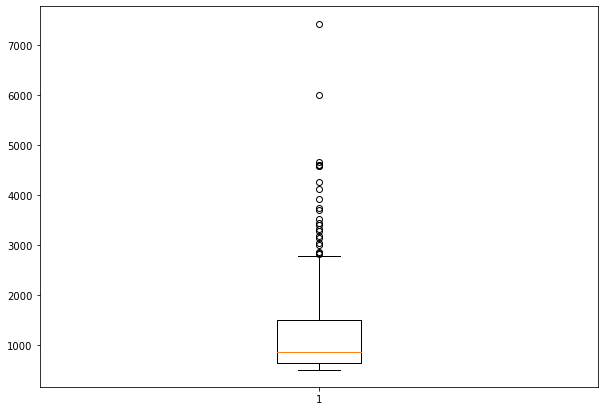

In [19]:
count_int_list = [int(i) for i in list(new_dict.values())]
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(count_int_list)
plt.show()

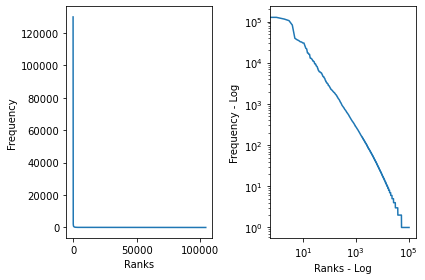

In [35]:
# Plotanto o gráfico de frequências antes da retirada de stopwords e palavras muito frequêntes
x_values = list(range(len(all_dict)))
y_values = all_dict.values()

fig, (a1, a2) = plt.subplots(1,2)
#plt.suptitle("")
a1.plot(x_values,y_values)
a1.set_xlabel('Ranks')
a1.set_ylabel('Frequency')

a2.loglog(x_values,y_values)
a2.set_xlabel('Ranks - Log')
a2.set_ylabel('Frequency - Log')

fig.tight_layout()
plt.savefig('zipf_law.png', transparent=True)
plt.show()

In [34]:
plt.savefig('zipf_law.png', transparent=True)

<Figure size 432x288 with 0 Axes>

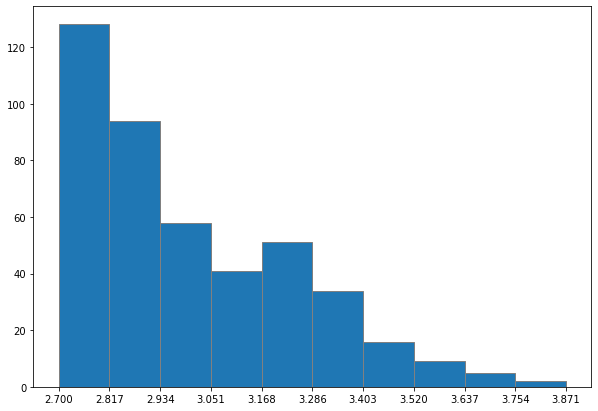

In [31]:
fig, ax = plt.subplots(figsize =(10, 7))
counts, bins, patches = ax.hist(np.log10(count_int_list), edgecolor='gray')

ax.set_xticks(bins)
plt.show()

### Salvando csv filtrado

In [ ]:
w = csv.writer(open("most_freq.csv", "w"))
for key, val in new_dict.items():
    w.writerow([key, val])

# Busca de Palavras no corpus

In [7]:
count['homem']

2506

In [8]:
count['mulher']

1229

In [9]:
count['pai']

1312

In [13]:
count['mae']

798

In [14]:
count['deus']

4602

In [15]:
count['terra']

2209

In [33]:
count['terra']

'2209'

In [35]:
count['mulheres']

'366'